In [78]:
from chaospy.descriptives.expected import E
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px

# import plotly.io as pio

# pio.renderers.default = "notebook_connected"

In [79]:
df = pd.read_hdf("./LPRES1000.h5")

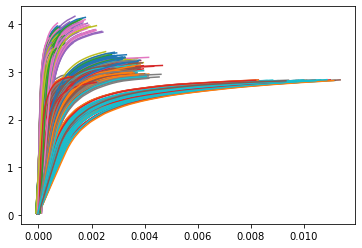

In [80]:
for R in df["R"].unique():
    df_curve = df[df["R"] == R]
    # print(R,df[df['R']==R].u.shape)
    plt.plot(df_curve.u, df_curve.load)

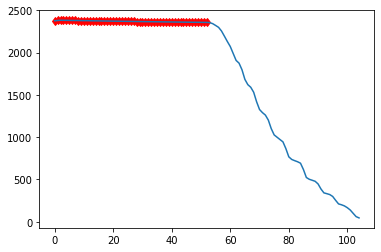

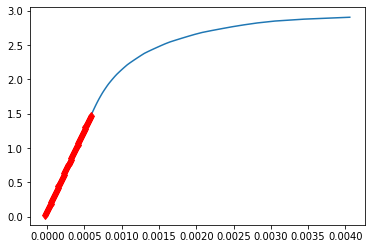

In [81]:
grd = np.gradient(df_curve.load, df_curve.u)

for i in range(grd.size):
    if grd[i] / grd[i + 1] > 1.005:
        break
    # print(i,grd[i])
plt.figure()
plt.plot(grd[:i], "rd")
plt.plot(grd)
plt.figure()
plt.plot(df_curve.u, df_curve.load)
plt.plot(df_curve.u[:i], df_curve.load[:i], "rd")

In [82]:
idx = []
thres = 1.01
for R in df["R"].unique():
    df_curve = df[df["R"] == R]
    grd = np.gradient(df_curve.load, df_curve.u)

    for i in range(grd.size):
        if grd[i] / grd[i + 1] > thres:
            break
    id = df.index[df.u == df_curve.u.values[i]].values[0]
    # print(id)
    idx.append(id)
print(len(idx))

400


In [83]:
px.scatter_3d(df.iloc[idx], x="R", y="t", z="load")

In [84]:
case_incr_max = [
    df["incr"][df["R"] == unique_R].idxmax() for unique_R in df["R"].unique()
]

In [85]:
px.scatter_3d(df.iloc[case_incr_max], x="R", y="t", z="load")

In [86]:
idx = []
thres = 1.01
for R in df["R"].unique():
    df_curve = df[df["R"] == R]

    t = df_curve.t.unique()[0]
    x = np.linspace(df_curve.u.min(), df_curve.u.max(), 1000)
    f = np.interp(x, df_curve.u, df_curve.load)
    grd = np.gradient(f, x)

    for i in range(grd.size):
        if grd[i] / grd[i + 1] > thres:
            break

    idx.append([f[i], t, R])

print(len(idx))
df_wrinkle = pd.DataFrame(np.asarray(idx), columns=["load", "t", "R"])

400


In [87]:
px.scatter_3d(df_wrinkle, x="t", y="R", z="load")

In [88]:
import chaospy

In [89]:
t = [25e-6, 50e-6]
R = [0.02, 0.04]

dist_t = chaospy.Uniform(*t)
dist_r = chaospy.Uniform(*R)
joint = chaospy.J(dist_t, dist_r)

expansion = chaospy.generate_expansion(4, joint)

In [90]:
doe = df.iloc[case_incr_max]

samples = doe[["t", "R"]].values
evaluations = doe["load"]

pce_model = chaospy.fit_regression(expansion, samples.T, evaluations)

In [91]:
doe["pce"] = pce_model(*samples.T)

<ipython-input-91-9703a4971504>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [92]:
px.scatter_3d(doe,x="t",y="R",z="pce")

In [93]:
px.scatter_3d(doe,x="t",y="R",z="load")

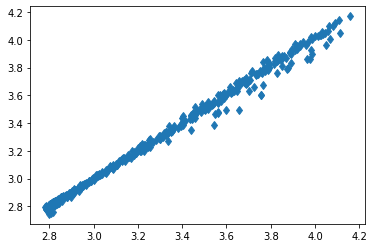

In [94]:
plt.plot(doe.pce,doe.load,'d')